# Reading and Writing HDF5 Files

Most of the time, your data will be in separate files which will be stored in separate spaces in your memory (specially true for image data). This is not efficient since we have to load the data one by one during training. A better way is to store all the data into one file so they are mapped in a contiguous space in the memory. However, this will pose another problem when your data is too big to fit in your memory. Memory mapped file systems / databases such as HDF5 addresses this problem by directly reading data from your storage and only loading the data you are currently reading into memory. It also provides a seemless interface that works as if you are working with a giant matrix. 

**In this notebook, you will learn to:**
- Write data into an hdf5 file
    - store (multiple) data sets in one hdf5 file
- Read data from an hdf5 file.

# Don't forget to install the h5py package and Pillow to read and write images
**`pip install Pillow`**

**`pip install h5py`**

In [1]:
import h5py
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
import os

%matplotlib inline

**Dataset**: For this exercise, we will be working with $64 \times 64$ images stored as separate `png` files in the `cat_train` and `cat_test` folders. The folders also include a text file (`labels.txt`) that encodes the ground truth labels for each image.

In [2]:
train_path = "cat_train"
test_path = "cat_test"

# get the list of file names in each folder
train_filenames = []
for file in os.listdir(train_path):
    if file.endswith(".png"):
        train_filenames.append("/".join([train_path, file]))
        
test_filenames = []
for file in os.listdir(test_path):
    if file.endswith(".png"):
        test_filenames.append("/".join([test_path, file]))

In [3]:
num_train = len(train_filenames)
num_test = len(test_filenames)

print("Number of training images =", num_train)
print("Number of test images =", num_test)

Number of training images = 209
Number of test images = 50


# Create hdf5 and write data into it

In [4]:
# create a blank hdf5 file. You can think of this as a dictionary which can store data referenced/indexed by keys
saveFile = h5py.File('cat_dataset.hdf5','w')

In [5]:
img_height = 64
img_width = 64

# The create_dataset function adds keys to your hdf5 file. 
# The important parameters are:
# (1) the name of the key
# (2) the shape of the data that will be stored. 
#     For images it is usually in the format (N, H, W, C) 
#     where N is the number of images, H is the height in pixels,
#     W is the width in pixels, and C is the number of channels (3 for colored images representing RGB)
# (3) the data type

# create datasets for the training images and labels
train_images = saveFile.create_dataset("train_x", shape=(num_train, img_height, img_width,3), dtype='float32')
train_labels = saveFile.create_dataset("train_y", shape=(num_train,1), dtype='int32')

In [6]:
for i in range(num_train):
    # read the images under `cat_train`
    img = misc.imread(train_filenames[i])
    # normalize images to [0,1] and store it in the hdf5 file under the "train_x" key/dataset.
    train_images[i] = img / 255. 

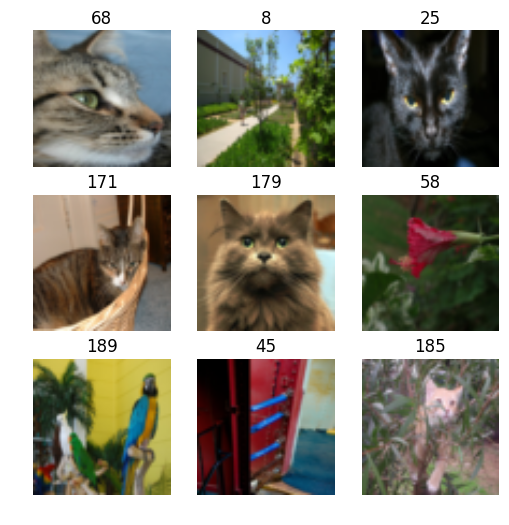

In [7]:
# randomly read data to check if the write was successful

randIdx = np.arange(num_train)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[randIdx[i]])
    plt.axis('off')
    plt.title(randIdx[i])

In [8]:
# create datasets for the testing images and labels
test_images = saveFile.create_dataset("test_x", shape=(num_test, img_height, img_width,3), dtype='float32')
test_labels = saveFile.create_dataset("test_y", shape=(num_test,1), dtype='int32')

In [9]:
for i in range(num_test):
    # read the images under `cat_test`
    img = misc.imread(test_filenames[i])
    # normalize images to [0,1] and store it in the hdf5 file under the "test_x" key/dataset.
    test_images[i] = img / 255. #normalize images to [0,1]

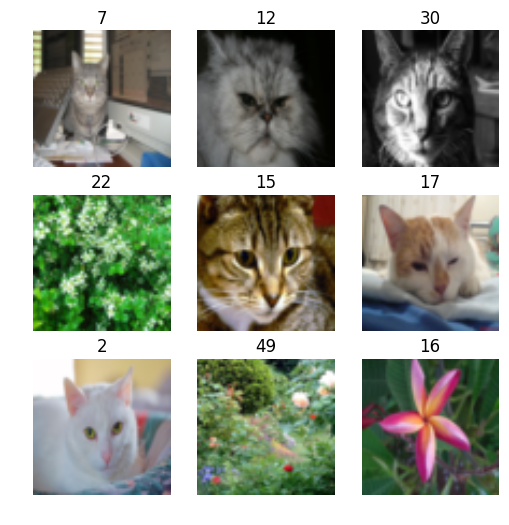

In [10]:
# randomly read data to check if the write was successful

randIdx = np.arange(num_test)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[randIdx[i]])
    plt.axis('off')
    plt.title(randIdx[i])

In [11]:
# read the corresponding labels for the train and test images

with open(train_path + "/labels.txt","r") as f:
    i = 0
    for l in f:
        # store the labels in the hdf5 file under the "train_y" key/dataset
        train_labels[i] = int(l)
        i += 1
        
with open(test_path + "/labels.txt","r") as f:
    i = 0
    for l in f:
        # store the labels in the hdf5 file under the "text_y" key/dataset
        test_labels[i] = int(l)
        i += 1

In [12]:
# close the hdf5 file writer.
saveFile.close()

# Read hdf5 file that you just created

In [13]:
# Open the hdf5 in read mode.
readHdf5 = h5py.File('cat_dataset.hdf5','r')

In [14]:
# prints the existing keys inside the hdf5 file.
for key in readHdf5.keys():
    print(key)

test_x
test_y
train_x
train_y


In [15]:
print("Train images shape =",readHdf5["train_x"].shape)
print("Train labels shape =",readHdf5["train_y"].shape)
print("Test images shape =",readHdf5["test_x"].shape)
print("Test labels shape =",readHdf5["test_y"].shape)

Train images shape = (209, 64, 64, 3)
Train labels shape = (209, 1)
Test images shape = (50, 64, 64, 3)
Test labels shape = (50, 1)


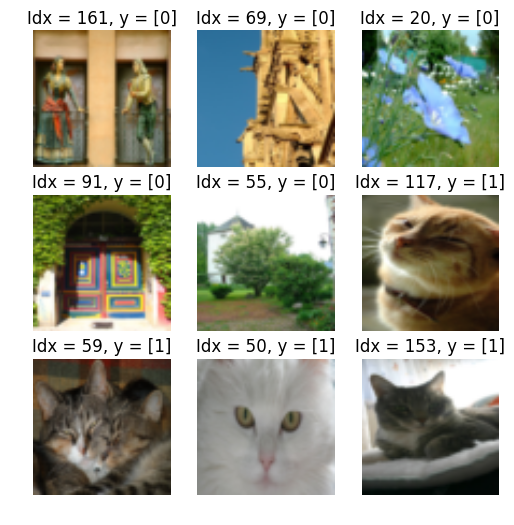

In [16]:
# randomly read and show images stored in the hdf5 file

randIdx = np.arange(num_train)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(readHdf5["train_x"][randIdx[i]])
    plt.axis('off')
    plt.title("Idx = " + str(randIdx[i]) +", y = " + str(readHdf5["train_y"][randIdx[i]]))

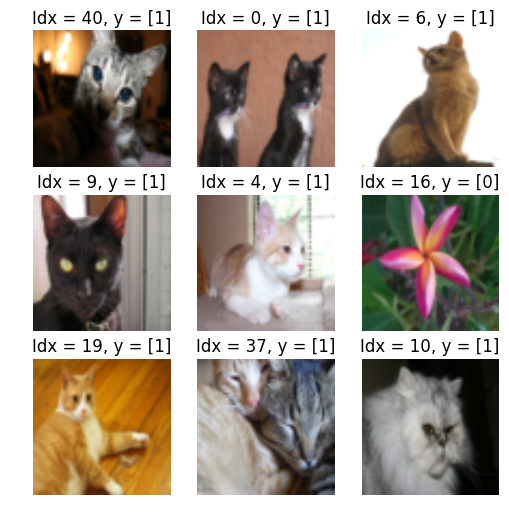

In [17]:
# randomly read and show images stored in the hdf5 file

randIdx = np.arange(num_test)
np.random.shuffle(randIdx)
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(readHdf5["test_x"][randIdx[i]])
    plt.axis('off')
    plt.title("Idx = " + str(randIdx[i]) +", y = " + str(readHdf5["test_y"][randIdx[i]]))